###  Implement Random Forest Classifier model to predict the safety of the car.
###### Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('car_evaluation.csv')
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = columns
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Encode categorical variables to numerical values using LabelEncoder
label_encoders = {}
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [4]:
X = df.drop('safety', axis=1)  # Drop the 'safety' column since it's the target
y = df['safety']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = rf_model.predict(X_test)
y_pred

array([2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0,
       2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1,

In [7]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.28034682080924855

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       121
           1       0.36      0.35      0.35       107
           2       0.18      0.19      0.18       118

    accuracy                           0.28       346
   macro avg       0.28      0.28      0.28       346
weighted avg       0.28      0.28      0.28       346


Confusion Matrix:
[[38 25 58]
 [30 37 40]
 [55 41 22]]


Text(58.222222222222214, 0.5, 'Truth')

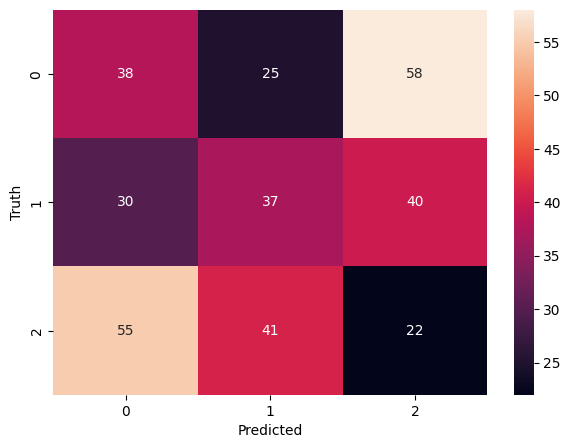

In [8]:
plt.figure(figsize = (7,5))
sn.heatmap(conf_matrix,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Optinal
def predict_safety():
    # Display possible options for each feature
    print(f"Possible values for buying: {list(label_encoders['buying'].classes_)}")
    buying = input("Enter buying: ").strip()

    print(f"Possible values for maint: {list(label_encoders['maint'].classes_)}")
    maint = input("Enter maint: ").strip()

    print(f"Possible values for doors: {list(label_encoders['doors'].classes_)}")
    doors = input("Enter doors: ").strip()

    print(f"Possible values for persons: {list(label_encoders['persons'].classes_)}")
    persons = input("Enter persons: ").strip()

    print(f"Possible values for lug_boot: {list(label_encoders['lug_boot'].classes_)}")
    lug_boot = input("Enter lug_boot: ").strip()

    print(f"Possible values for class: {list(label_encoders['class'].classes_)}")
    car_class = input("Enter class: ").strip()

    try:
        # Encode the input using the LabelEncoders
        buying_encoded = label_encoders['buying'].transform([buying])[0]
        maint_encoded = label_encoders['maint'].transform([maint])[0]
        doors_encoded = label_encoders['doors'].transform([doors])[0]
        persons_encoded = label_encoders['persons'].transform([persons])[0]
        lug_boot_encoded = label_encoders['lug_boot'].transform([lug_boot])[0]
        class_encoded = label_encoders['class'].transform([car_class])[0]

        # Create a DataFrame for the input
        input_data = pd.DataFrame([[buying_encoded, maint_encoded, doors_encoded, persons_encoded, lug_boot_encoded, class_encoded]],
                                  columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'class'])

        # Make the prediction
        prediction = rf_model.predict(input_data)

        # Decode the prediction back to the original class label
        predicted_safety = label_encoders['safety'].inverse_transform(prediction)[0]

        return predicted_safety

    except ValueError as e:
        return f"Invalid input: {e}. Please enter values from the displayed options."

# Example usage
predicted_safety = predict_safety()
print(f"The predicted safety rating is: {predicted_safety}")

Possible values for buying: ['high', 'low', 'med', 'vhigh']


In [ ]:
# Done